In [1]:
from nbpictures import find_urls, get_picture_from_url, get_metadata_from_url, display_finds, load_picture
from IPython.display import HTML
import skimage
from skimage import feature
import pickle
import json
import io

In [2]:
r = find_urls('bodø, wilse')

In [3]:
r

['https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_W_24348/full/{width},{height}/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_W_32402/full/{width},{height}/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_W_32406/full/{width},{height}/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_W_32403/full/{width},{height}/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_W_35721/full/{width},{height}/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_W_33034/full/{width},{height}/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_W_24352/full/{width},{height}/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_W_24353_A/full/{width},{height}/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_foto_NF_W_24351/full/{width},{height}/0/native.jpg',

In [4]:
p = get_picture_from_url(r[0], width=500)

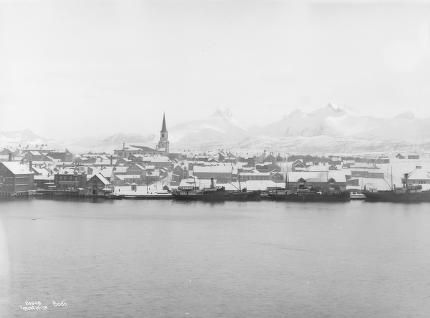

In [6]:
p

In [5]:
get_metadata_from_url(r[0])

{'': '<a href="https://www.nb.no/items/849428e56e088a887b13e390d650fec0?manifest=https://api.nb.no/catalog/v1/iiif/849428e56e088a887b13e390d650fec0/manifest" target="_blank"><img src="https://www.nb.no/content/uploads/2018/08/logo-iiif.png" alt="IIIF Drag-n-drop"></a>',
 'Andre opplysninger': 'Prot: Bodø',
 'Dato': '01.05.1924',
 'Eier': 'Norsk Folkemuseum',
 'Emne': 'by | domkirke | havn | dampbåter',
 'Fotograf': 'Wilse, Anders Beer',
 'Kilde for metadata': 'galnor.nb.no (117811)',
 'Medietype': 'bilder',
 'Omfang': 'Negativ s/h nitrat 16 x 21',
 'Omtalt/Avbildet': 'Bodø domkirke',
 'Produsent': 'Wilse, Anders Beer',
 'Sted': 'Bodø, Bodø',
 'Tilgang': 'Tilgang for alle',
 'Tilvirker': 'Wilse, Anders Beer',
 'Tittel': 'Wilse, Anders Beer',
 'Varig lenke': '<a href="https://urn.nb.no/URN:NBN:no-nb_foto_NF_W_24348" target="_blank">https://urn.nb.no/URN:NBN:no-nb_foto_NF_W_24348</a>'}

In [ ]:
find_urls??

In [ ]:
from nbpictures import super_search

In [ ]:
super_search('vinter')

In [ ]:
x = super_search('vinter')
[f['_links']['thumbnail_custom']['href']
            for f in x['_embedded']['items'] 
            if f['accessInfo']['accessAllowedFrom'] == 'EVERYWHERE'
            and 'thumbnail_custom' in f['_links']]

In [ ]:
with io.BytesIO() as output:
    p.save(output, format='PNG')
    contents = output.getvalue()

In [8]:
fs = feature.blob_dog(p)
fs

array([], shape=(0, 3), dtype=float64)

In [9]:
fs.tostring()

b''

In [10]:
np.frombuffer(_58)

NameError: name 'np' is not defined

In [ ]:
np.array(np.array_str(fs))

In [ ]:
np.fromstring(np.array_repr(fs))

In [ ]:
feature.blob_doh(p)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
img = np.array(p)
fig, ax = plt.subplots()
ax.imshow(img)

In [ ]:
from matplotlib.patches import Circle, Wedge, Polygon
fig, ax = plt.subplots()
for f in fs:
    print(f)
    c = Circle((f[0], f[1]), f[3], fill=False)
    ax.add_artist(c)
ax.imshow(img)


In [ ]:
p

In [ ]:
get_metadata_from_url(r[4])

In [ ]:
import sqlite3
import re
with sqlite3.connect('test.db') as con:
    cur = con.cursor()
    cur.execute("create table if not exists foto (urn varchar, metadata varchar, feature varchar)")
    for i in r:
        p = get_picture_from_url(i, width=300)
        m = json.dumps(get_metadata_from_url(i))
        s = feature.blob_doh(p)
        f = s.tostring()
        urn = re.findall("(URN.*?)(?:/)", i)[0]
        #print(urn, m, f)
        cur.execute("insert into foto values (?, ?, ?)", (urn, m, f))


In [ ]:
with sqlite3.connect('test.db') as con:
    cur = con.cursor()
    cur.execute("select * from foto")
    for row in cur:
        urn = row[0]
        meta = json.loads(row[1])
        feature = np.frombuffer(row[2])
        print(urn, meta, feature)

In [ ]:

r[0]

In [ ]:
display_finds??